<a href="https://colab.research.google.com/github/Pranita1994/ML-Projects/blob/main/OCD_patient's_dataset_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OCD Patient Dataset: Understanding Demographics, Symptoms, and Treatment**

## **Project summary:**
The project centers on analyzing the "OCD Patient Dataset: Demographics & Clinical Data," a comprehensive collection of information pertaining to 1500 individuals diagnosed with Obsessive-Compulsive Disorder (OCD). This dataset encapsulates diverse parameters, including demographic details, clinical information, symptom severity, medication profiles, and familial history, offering a holistic view of OCD manifestation in these individuals. The primary objective is to comprehensively understand the demographic profiles, clinical characteristics, symptomatology, and treatment approaches within this population. The insights derived from this analysis aim to aid researchers, clinicians, and mental health professionals in gaining deeper insights into OCD and refining treatment strategies.

## **Problem statement:**
Obsessive-Compulsive Disorder (OCD) is a complex mental health condition characterized by intrusive thoughts (obsessions) and repetitive behaviors or mental acts (compulsions). Understanding the diverse demographic profiles, clinical characteristics, symptom severity, treatment patterns, and potential familial influences within the OCD patient population remains crucial for improving diagnostic accuracy and refining treatment strategies. The lack of comprehensive, centralized datasets that encompass a wide range of parameters impedes a nuanced understanding of OCD manifestation and its variations across individuals. Hence, this project aims to analyze the "OCD Patient Dataset" to elucidate demographic patterns, clinical presentations, symptom severity, treatment modalities, and familial influences, ultimately contributing to a more profound comprehension of OCD and guiding more effective interventions.

### **Import Libraries:**

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### **Load dataset from kaggle**

In [127]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [128]:
!kaggle datasets download -d ohinhaque/ocd-patient-dataset-demographics-and-clinical-data

ocd-patient-dataset-demographics-and-clinical-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [129]:
import zipfile
zip_ref = zipfile.ZipFile('/content/ocd-patient-dataset-demographics-and-clinical-data.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [130]:
df = pd.read_csv('/content/ocd_patient_dataset.csv')
df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,None,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,None


In [131]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1500 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [132]:
# Summary statistics for numerical columns
df.describe()

,Patient ID,Age,Duration of Symptoms (months),Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions)
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,5541.254000,46.781333,121.745333,20.048000,19.62600
std,2562.389469,16.830321,67.404610,11.823884,11.78287
min,1017.000000,18.000000,6.000000,0.000000,0.00000
25%,3338.000000,32.000000,64.000000,10.000000,9.00000
50%,5539.500000,47.000000,121.000000,20.000000,20.00000
75%,7745.500000,61.000000,178.000000,31.000000,29.00000
max,9995.000000,75.000000,240.000000,40.000000,40.00000


Inference from the Statistics:


*   The dataset consists of 1500 individuals diagnosed with OCD.

*   Patients' ages range from 18 to 75 years, with an average age of around 46.78 years and a noticeable spread in age, as indicated by the standard deviation.

*   The duration of symptoms ranges from 6 months to 20 years, with an average duration of approximately 10 years (121.75 months).

*  Y-BOCS scores for both obsessions and compulsions have a broad range from 0 to 40, indicating varying levels of severity among patients, with an average score around 20 for both.







In [133]:
# Check for missing values
df.isnull().sum()

Patient ID                       0
Age                              0
Gender                           0
Ethnicity                        0
Marital Status                   0
Education Level                  0
OCD Diagnosis Date               0
Duration of Symptoms (months)    0
Previous Diagnoses               0
Family History of OCD            0
Obsession Type                   0
Compulsion Type                  0
Y-BOCS Score (Obsessions)        0
Y-BOCS Score (Compulsions)       0
Depression Diagnosis             0
Anxiety Diagnosis                0
Medications                      0
dtype: int64

##EDA on the dataset

In [134]:
unique_val = ['Patient ID', 'Age', 'Gender', 'Ethnicity', 'Marital Status',
       'Education Level', 'OCD Diagnosis Date',
       'Duration of Symptoms (months)', 'Previous Diagnoses',
       'Family History of OCD', 'Obsession Type', 'Compulsion Type',
       'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)',
       'Depression Diagnosis', 'Anxiety Diagnosis', 'Medications']
for col in unique_val:

    print(f"Unique values in '{col}': {df[col].unique()}\n\n")


Unique values in 'Patient ID': [1018 2406 1188 ... 6089 3808 2221]


Unique values in 'Age': [32 69 57 27 56 38 36 72 21 73 23 68 48 29 25 55 50 66 62 28 43 47 74 60
 22 24 70 33 41 58 65 49 37 63 46 31 64 54 61 19 71 53 52 35 51 59 42 40
 39 26 75 67 34 18 45 44 20 30]


Unique values in 'Gender': ['Female' 'Male']


Unique values in 'Ethnicity': ['African' 'Hispanic' 'Asian' 'Caucasian']


Unique values in 'Marital Status': ['Single' 'Divorced' 'Married']


Unique values in 'Education Level': ['Some College' 'College Degree' 'High School' 'Graduate Degree']


Unique values in 'OCD Diagnosis Date': ['2016-07-15' '2017-04-28' '2018-02-02' ... '2022-09-14' '2018-04-14'
 '2020-12-23']


Unique values in 'Duration of Symptoms (months)': [203 180 173 126 168  46 110 197  84  47  95 233  48 141 108 206 147  62
  73 220  89 208  39  14 192 134  42 226 151  90  58 193  49 112 160 140
 217  34 207 154  11  59  22  92 236  65 167  24 229  85  83 222  33  61
  67  23 118  88 156 119 186 125 172 

In [135]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame containing the dataset

# Initialize LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = (['Gender','Ethnicity','Marital Status','Education Level','Previous Diagnoses','Family History of OCD','Obsession Type','Compulsion Type','Depression Diagnosis','Anxiety Diagnosis','Medications'])
for i in categorical_cols:
# Encode 'Gender' column to numerical values
  df[i] = label_encoder.fit_transform(df[i])

# Display updated DataFrame with 'Gender' column converted to numerical values
df.head()


,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,0,0,2,3,2016-07-15,203,1,0,1,0,17,10,1,1,2
1,2406,69,1,0,0,3,2017-04-28,180,2,1,1,4,21,25,1,1,3
2,1188,57,1,3,0,0,2018-02-02,173,1,0,0,0,3,4,0,0,0
3,6200,27,0,3,1,0,2014-08-25,126,3,1,4,4,14,28,1,1,3
4,5824,56,0,3,1,2,2022-02-20,168,3,1,2,2,39,18,0,0,1


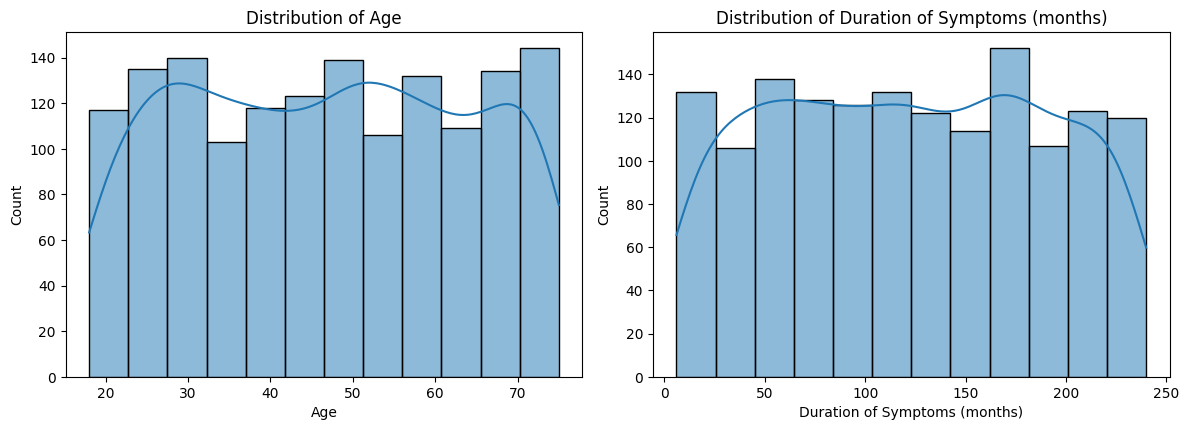

In [136]:
# Histograms for numerical variables
plt.figure(figsize=(12, 8))
numerical_cols = ['Age', 'Duration of Symptoms (months)']
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [137]:
import plotly.express as px

# Create subplots for 1 row and 2 columns
fig = px.histogram(df, x=['Age', 'Duration of Symptoms (months)'], marginal='box', nbins=47,
                   facet_row=None, facet_col=None)

fig.update_layout(bargap=0.1, width=1100, height=500, title='Distribution of Age and Duration of Symptoms')
fig.show()


In [138]:
# Assuming 'Gender', 'Ethnicity', 'Marital Status', 'Education Level' are categorical columns
df['Gender'] = df['Gender'].astype('category')
df['Ethnicity'] = df['Ethnicity'].astype('category')
df['Marital Status'] = df['Marital Status'].astype('category')
df['Education Level'] = df['Education Level'].astype('category')


In [139]:
categorical_cols = ['Gender', 'Ethnicity', 'Marital Status', 'Education Level']
for col in categorical_cols:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'Gender': [0, 1]
Categories (2, int64): [0, 1]
Unique values in 'Ethnicity': [0, 3, 1, 2]
Categories (4, int64): [0, 1, 2, 3]
Unique values in 'Marital Status': [2, 0, 1]
Categories (3, int64): [0, 1, 2]
Unique values in 'Education Level': [3, 0, 2, 1]
Categories (4, int64): [0, 1, 2, 3]


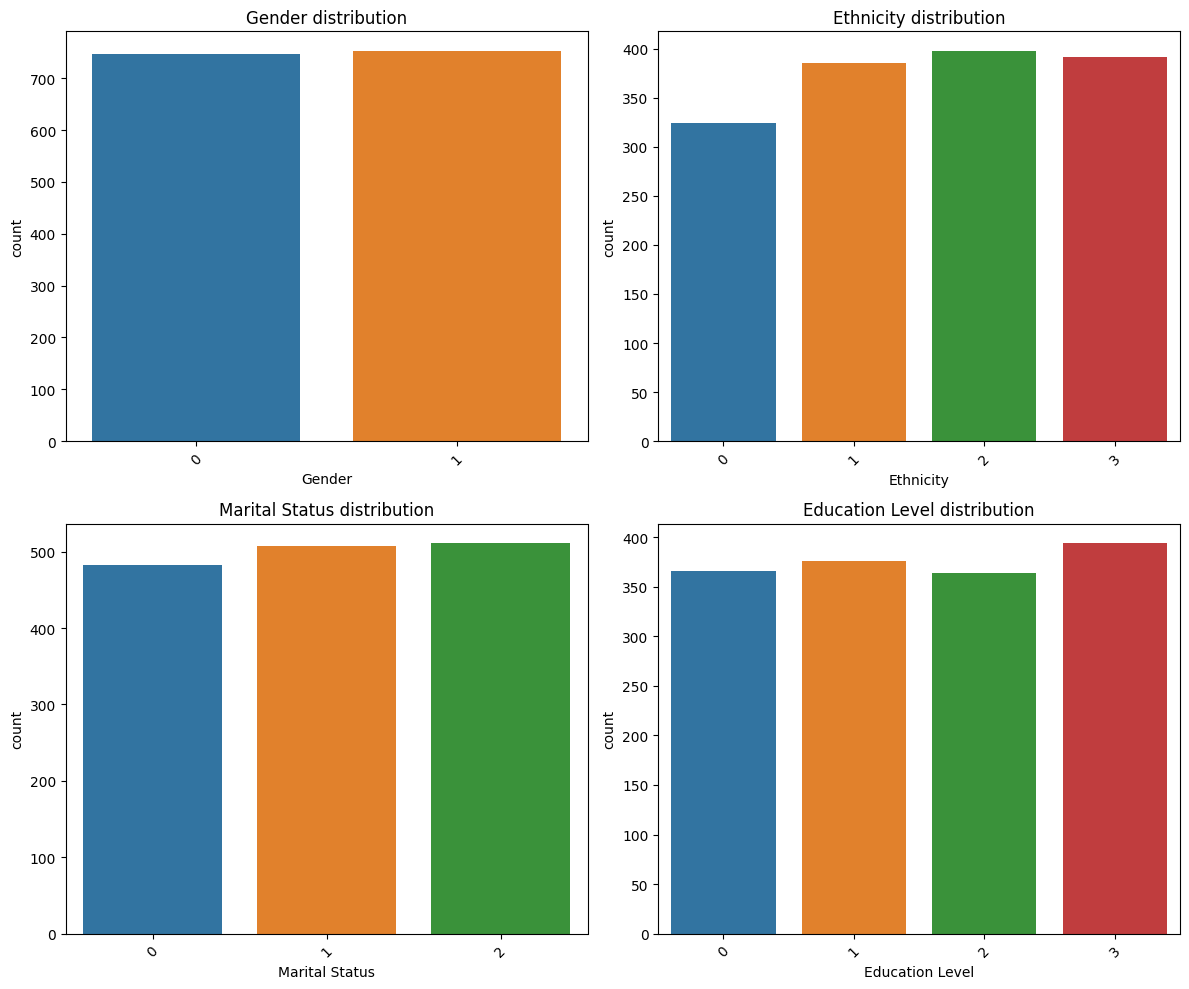

In [140]:
# Countplot for categorical variables
plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col])
    plt.title(f'{col} distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()


In [141]:
df.corr()

<ipython-input-141-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Patient ID,Age,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
Patient ID,1.000000,0.029146,-0.026091,0.026144,0.005894,-0.003857,-0.007668,0.019816,0.024720,-0.001634,-0.047666,-0.005611
Age,0.029146,1.000000,-0.001505,-0.021888,0.036869,-0.029595,0.018611,-0.003162,0.014137,-0.008181,0.005089,0.009735
Duration of Symptoms (months),-0.026091,-0.001505,1.000000,-0.035337,0.013290,-0.013142,0.004612,0.007946,0.039980,0.004189,-0.049088,0.003981
Previous Diagnoses,0.026144,-0.021888,-0.035337,1.000000,-0.008716,0.021442,-0.035074,-0.022304,0.014836,0.026769,0.026510,-0.018512
Family History of OCD,0.005894,0.036869,0.013290,-0.008716,1.000000,0.022293,0.014779,-0.005018,-0.029746,-0.013732,-0.012019,0.044888
Obsession Type,-0.003857,-0.029595,-0.013142,0.021442,0.022293,1.000000,-0.029019,-0.017142,-0.025544,0.010610,-0.027402,-0.010685
Compulsion Type,-0.007668,0.018611,0.004612,-0.035074,0.014779,-0.029019,1.000000,-0.019384,0.051787,-0.005993,0.028018,-0.011344
Y-BOCS Score (Obsessions),0.019816,-0.003162,0.007946,-0.022304,-0.005018,-0.017142,-0.019384,1.000000,0.030631,-0.000345,0.016126,0.002473
Y-BOCS Score (Compulsions),0.024720,0.014137,0.039980,0.014836,-0.029746,-0.025544,0.051787,0.030631,1.000000,-0.001276,-0.025370,-0.048656
Depression Diagnosis,-0.001634,-0.008181,0.004189,0.026769,-0.013732,0.010610,-0.005993,-0.000345,-0.001276,1.000000,-0.038722,0.027419


<ipython-input-142-8b2fe297326d>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



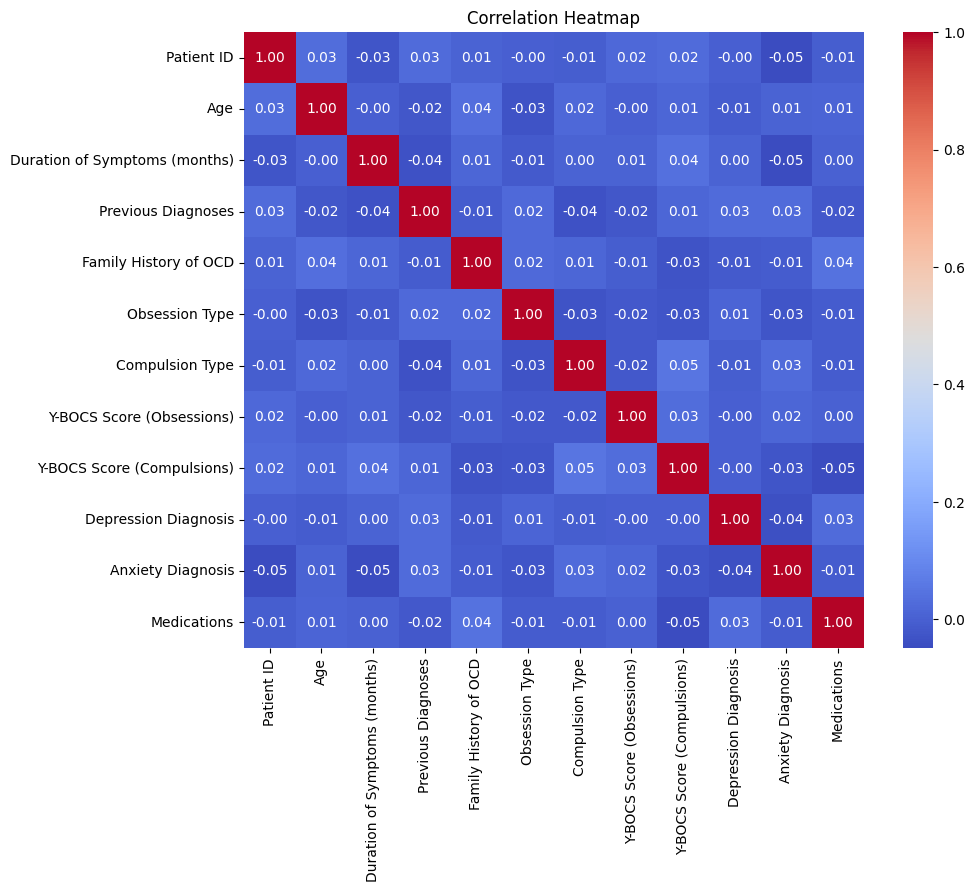

In [142]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

*   **Patient ID vs. Other Variables**:
Patient ID has negligible correlations (close to zero) with other variables (all correlations are below 0.03). This indicates no meaningful linear relationship between the patient IDs and the other numerical columns.

*   **Age vs. Other Variables**:
Age has minimal correlations with other variables (between -0.003 to 0.029). There's no strong linear relationship observed between age and the duration of symptoms or the severity of obsessions/compulsions.

*  **Duration of Symptoms vs. Other Variables**:
Duration of Symptoms exhibits very weak correlations with the other variables (ranging from -0.026 to 0.040). These correlations suggest a limited linear relationship between the duration of symptoms and the variables like age or severity scores.

*   **Y-BOCS Score (Obsessions) and Y-BOCS Score (Compulsions)**:
The scores for obsessions and compulsions exhibit slightly positive correlations (0.020 to 0.031), indicating a weak positive relationship between the severity of obsessions and compulsions within the dataset.

In conclusion, based on the correlation matrix alone, it seems that these variables don't strongly correlate in a linear manner within this dataset.

## **Data Preprocessing**

In [143]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame containing the dataset

# Initialize LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = (['Gender','Ethnicity','Marital Status','Education Level','Previous Diagnoses','Family History of OCD','Obsession Type','Compulsion Type','Depression Diagnosis','Anxiety Diagnosis','Medications'])
for i in categorical_cols:
# Encode 'Gender' column to numerical values
  df[i] = label_encoder.fit_transform(df[i])

# Display updated DataFrame with 'Gender' column converted to numerical values
df.head()


,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,0,0,2,3,2016-07-15,203,1,0,1,0,17,10,1,1,2
1,2406,69,1,0,0,3,2017-04-28,180,2,1,1,4,21,25,1,1,3
2,1188,57,1,3,0,0,2018-02-02,173,1,0,0,0,3,4,0,0,0
3,6200,27,0,3,1,0,2014-08-25,126,3,1,4,4,14,28,1,1,3
4,5824,56,0,3,1,2,2022-02-20,168,3,1,2,2,39,18,0,0,1


In [144]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RepeatedKFold
model_dict = {"abc": AdaBoostClassifier(),
              "gbc": GradientBoostingClassifier(),
              "rfc": RandomForestClassifier(),
              "knn": KNeighborsClassifier(),
              "dtc": DecisionTreeClassifier()
             }
X = df.drop(['OCD Diagnosis Date', 'Depression Diagnosis'], axis=1)  # Features excluding 'OCD Diagnosis Date' and the target variable
y = df['Depression Diagnosis']  # Target variable to predict, change 'Depression Diagnosis' to the actual target variable

# Cross value scores of the models
for key, val in model_dict.items():
    print(f"cross validation for {key}")
    score = cross_val_score(val, X, y, cv= 5, scoring='neg_mean_squared_error')
    mean_score = -np.sum(score)/5
    sqrt_score = np.sqrt(mean_score)
    print(sqrt_score)

cross validation for abc
0.6923390306297439
cross validation for gbc
0.6942621983083913
cross validation for rfc
0.7122733557654205
cross validation for knn
0.7164728420068226
cross validation for dtc
0.7042726744663603


In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

X = df.drop(['OCD Diagnosis Date', 'Depression Diagnosis'], axis=1)  # Features excluding 'OCD Diagnosis Date' and the target variable
y = df['Depression Diagnosis']  # Target variable to predict, change 'Depression Diagnosis' to the actual target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
clf = RandomForestClassifier()

# Define the distribution of hyperparameters to sample from
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': False}
Best Score: 0.5158333333333334


In [146]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Selecting features and target variable
X = df.drop(['OCD Diagnosis Date', 'Depression Diagnosis'], axis=1)  # Features excluding 'OCD Diagnosis Date' and the target variable
y = df['Depression Diagnosis']  # Target variable to predict, change 'Depression Diagnosis' to the actual target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=50)
rfc = RandomForestClassifier(n_estimators=50)

# Train the model
knn.fit(X_train, y_train)
rfc.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)
y_pred1 = rfc.predict(X_test)

# Calculate accuracy
accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy of knn:", accuracy1)
accuracy2 = accuracy_score(y_test, y_pred1)
print("Accuracy of rfc", accuracy2)

Accuracy of knn: 0.5233333333333333
Accuracy of rfc 0.52


In [147]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df' is your DataFrame containing the dataset

# Selecting features and target variable
X = df.drop(['OCD Diagnosis Date', 'Depression Diagnosis'], axis=1)  # Features excluding 'OCD Diagnosis Date' and the target variable
y = df['Depression Diagnosis']  # Target variable to predict, change 'Depression Diagnosis' to the actual target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initializing the Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42, min_samples_split=10, min_samples_leaf=4)

# Training the classifier
clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.51      0.15      0.24       142
           1       0.53      0.87      0.66       158

    accuracy                           0.53       300
   macro avg       0.52      0.51      0.45       300
weighted avg       0.52      0.53      0.46       300



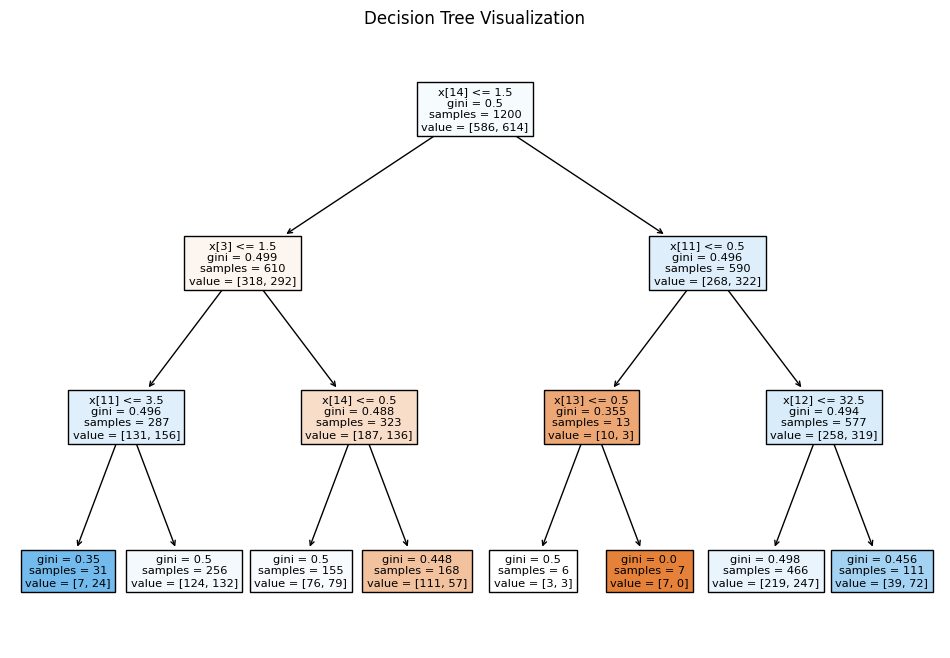

In [148]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True)
plt.title("Decision Tree Visualization")
plt.show()